In [1]:
import gensim
import os

In [73]:
def get_files_from_path(path):
    #dir_docx="e:/workspace/python/FONDEF/MamAI/src/ejemplos_aleatorios"
    archives = os.listdir(path)
    return archives

import docx2txt
from docx2python import docx2python
import docx
def get_text_hall_imp(path_file):
    #path="e:/workspace/python/FONDEF/MamAI/src/ejemplos_aleatorios"    
    str_token =':'
    hallazgos_text = ''
    impresion_text = ''
    #for file in archives :
    #print(path_file)
    doc = docx.Document(path_file)
    all_paras = doc.paragraphs
    len(all_paras)
    for para in all_paras:        
       #print("-------")
       #print(para.text)
       if para.text == 'Hallazgos:' :
           str_token ='Hallazgos:'
           continue

       if str_token == 'Hallazgos:' and para.text != '':
           #print("Hallazgos "+para.text)  
           if 'Impresión:' in para.text:                
               str_token ='Impresión:'
               continue
           else:
               #print("Hallazgos "+para.text)  
               hallazgos_text += ''.join(para.text)
               
       if str_token == 'Impresión:' and para.text != '' :
           #if para.text not in 'BIRADS':
           if para.text.find("BIRADS") == -1:
                #print("Impresión "+para.text)
                impresion_text += ''.join(para.text)
           else :
                break
    #out = {'impresiones':impresion_text, 'hallazgos':hallazgos_text}
    #out = impresion_text + '\n' + hallazgos_text
    out = impresion_text + '\n' + hallazgos_text
    return out


def findTextBlock(text,token) :
    for para in all_paras:        
        if token in para.text:
            print(token," ",para.text)
            continue


def get_text_in_lemmas(text):
    doc = sp_nlp(text)
    return " ".join([token.lemma_ for token in doc])

def set_text_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = " ".join([token for token in [word for word in text_tokens if not word in stopwords.words('spanish')]])
    return " ".join([token for token in [word for word in word_tokenize(text) if not word in stopwords.words('spanish')]])

def find_lemmas(context):
    #print(context)
    pos_arr = []
    set_hallazgos = set()
    for arr_lemmas in diccionario_hallazgos :
        for text in  arr_lemmas:
            #print('texto ',text.strip())
            sub_index = context.find(text.strip())
            if(sub_index > -1 and text not in set_hallazgos) :   
                ubicacion = get_ubicacion_hallazgo(context,text)             
                tipo_sent = get_sentimiento_hallazgo(ubicacion["ubicacion"]['answer'])
                new_obj = {"tipo":text, "hallazgo": ubicacion , "sent": tipo_sent,"position":sub_index}
                #print(new_obj)
                pos_arr.append( new_obj )
                set_hallazgos.add(text)

    return pos_arr

def get_ubicacion_hallazgo(context, texto) :
   # pregunta = '¿ Tiene '+ texto +'?'
   # print(pregunta," ",nlp({'question':pregunta, 'context':context}))
   # hallazgo = nlp({'question':pregunta, 'context':context})    
    pregunta = '¿ donde está '+ texto +'?'
    #print(pregunta," ",nlp({'question':pregunta, 'context':context}))
    ubicacion = nlp({'question':pregunta, 'context':context})
    return {"ubicacion":ubicacion}

def get_sentimiento_hallazgo(texto) :
    analysis = TextBlob(texto)
    #analysis.translate(to='es')
    #print (analysis)
    return  analysis.sentiment   

def docx_to_plaintext(path_file):
    #path="e:/workspace/python/FONDEF/MamAI/src/ejemplos_aleatorios"    
    text = ''
    #for file in archives :
    #print(path_file)
    doc = docx.Document(path_file)
    all_paras = doc.paragraphs    
    for para in all_paras:  
        text += ''.join(para.text)
        print(text)
    return text

def docs_as_list(paths) : 
    documents = []   
    for path  in paths:
        print(path)
        document_paths = os.listdir(path)
        for document in document_paths:
            #with open (path + document, "r") as doc:
            documents.append(gensim.utils.simple_preprocess(get_text_hall_imp(path + document)))
    return documents

In [74]:
documents = docs_as_list(["ejemplos_aleatorios/"])

ejemplos_aleatorios/


In [75]:
print(len(documents))

200


In [76]:
model = gensim.models.Word2Vec(documents,  window = 20, min_count = 1, workers = 8)
model.train(documents,total_examples=len(documents), epochs = 20)

(127087, 204620)

In [162]:
print(model.wv.most_similar(positive="calcificación", topn=5))
print(model.wv.most_similar(positive="mama", topn=5))
print(model.wv.most_similar(positive="nodulo", topn=5))
print(model.wv.most_similar(positive="benigna", topn=5))
print(model.wv.most_similar(positive="maligna", topn=5))
print(model.wv.most_similar(positive="izquierda", topn=5))
print(model.wv.most_similar(positive="derecha", topn=5))
print(model.wv.most_similar(positive="cuadrante", topn=5)) 
print(model.wv.most_similar(positive="asimetría", topn=5))  
print(model.wv.most_similar(positive="densidad", topn=5))
print(model.wv.most_similar(positive="aumento", topn=5)) 
print(model.wv.most_similar(positive="linfonodo", topn=5)) 
print(model.wv.most_similar(positive="retracción", topn=5)) 
print(model.wv.most_similar(positive="agrupadas", topn=5)) 
print(model.wv.most_similar(positive="accesorio", topn=5)) 
print(model.wv.most_similar(positive="variaciones", topn=5)) 
print(model.wv.most_similar(positive="bilaterales", topn=5))
print(model.wv.most_similar(positive="glandular", topn=5))
print(model.wv.most_similar(positive="adiposo", topn=5))
print(model.wv.most_similar(positive="pezón", topn=5))
print(model.wv.most_similar(positive="examen", topn=5))

[('adiposo', 0.9677423238754272), ('mantienen', 0.9551752209663391), ('benigna', 0.9494717121124268), ('clip', 0.9469924569129944), ('accesorio', 0.9463761448860168)]
[('derecha', 0.9959192276000977), ('nodular', 0.9943021535873413), ('en', 0.9925679564476013), ('izquierda', 0.9835778474807739), ('superiores', 0.979103684425354)]
[('marcador', 0.9457198977470398), ('intramamarios', 0.9314815998077393), ('actualidad', 0.9211386442184448), ('delimitado', 0.9097598195075989), ('observan', 0.9049181938171387)]
[('respecto', 0.960252046585083), ('dispone', 0.9500353932380676), ('calcificación', 0.9494718909263611), ('sospechosas', 0.946153461933136), ('cambios', 0.9455501437187195)]
[('mantener', 0.9161897897720337), ('leve', 0.8952493667602539), ('examen', 0.8611348867416382), ('compuesta', 0.8504279851913452), ('utilidad', 0.8418024182319641)]
[('nodular', 0.9933866858482361), ('derecha', 0.9856412410736084), ('mama', 0.9835778474807739), ('situación', 0.9783182144165039), ('en', 0.974836

In [163]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocab = ["nodulo", "calcificación", "mama" , "piel","benigna","maligna","izquierda","derecha","cuadrante", "nodulillo","asimetría","densidad","aumento","linfonodo","retracción","agrupadas","pezón","adiposo","glandular","bilaterales","variaciones","accesorio","tejido","examen","delimitado","sospechosas"]
def tsne_plot(model : gensim.models.word2vec.Word2Vec):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model.wv.get_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

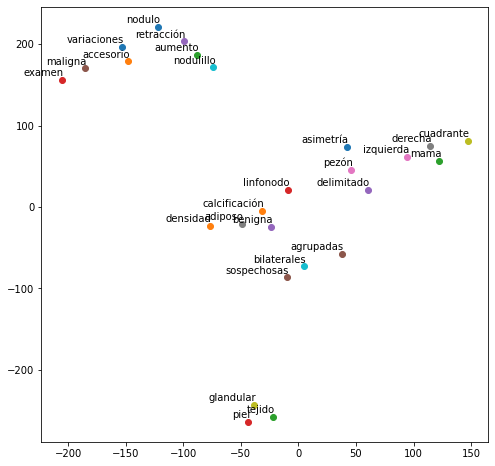

In [164]:
model.wv.get_vector("pezón")
tsne_plot(model)

In [108]:
model